In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import itertools

import warnings
warnings.filterwarnings('ignore')


# Merge prediction results with market value data: 

### mvel1 is the market value of the stock / total stock market value at the end of the last month

In [2]:
crsp = pd.read_pickle('/Users/leeyuehsin_macmini/Desktop/論文/1. 資料整理/2. CRSP資料整理/CRSP.pickle')
PERMNO_CUSIP_Map = crsp[['PERMNO', 'CUSIP']].drop_duplicates().reset_index(drop = True)

In [3]:
# Market Value and Liquidity Filters
mv = pd.read_pickle('mvel1.pickle')
mv['year_month'] = mv['year_month'].astype(str)

print('Market Value Data:')
display(mv.head())

# 篩選ETF持有的股票
ETFs = pd.read_csv('ETFs.csv')
ETFs['year_month'] = ETFs['year_month'].astype(str)
ETFs['CUSIP'] = ETFs['CUSIP'].str[:8]
ETFs.rename(columns={'Group':'mvgroup'}, inplace=True)

NNd = pd.read_csv('NN3_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
NNs = pd.read_csv('NN3_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

XGBd = pd.read_csv('XGB_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
XGBs = pd.read_csv('XGB_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

LGBMd = pd.read_csv('LGBM_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
LGBMs = pd.read_csv('LGBM_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

def merge_data(data, PERMNO_CUSIP_Map, mv, ETFs):
    data = pd.merge(data, PERMNO_CUSIP_Map, on='PERMNO', how='left')
    data = pd.merge(data, mv, on=['year_month', 'PERMNO'], how='inner')
    data = pd.merge(data, ETFs, on=['year_month', 'CUSIP'], how='inner')
    data['tpb'] = data['Top_prob_pred'] + data['Bot_prob_pred']
    data = data.drop_duplicates(subset=['CUSIP', 'year_month']) #有些股票被重複持有
    return data


datas = {'NNd': NNd, 'NNs': NNs, 'XGBd': XGBd, 'XGBs': XGBs, 'LGBMd': LGBMd, 'LGBMs': LGBMs}

for data in datas:
    df = datas[data]
    datas[data] = merge_data(df, PERMNO_CUSIP_Map, mv, ETFs)
    
for i in datas:
    print(i + ' Data:')
    display(datas[i])

Market Value Data:


,PERMNO,year_month,mvel1,stockmv
0,10001,1995-02,0.000004,17232.140124
1,10001,1995-03,0.000004,17285.953820
2,10001,1995-04,0.000004,17360.205556
3,10001,1995-05,0.000003,17213.352992
4,10001,1995-06,0.000003,17809.055474


NNd Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.190150,0.198881,-0.008731,72913210,0.000076,2.057702e+06,Small,0.389030
1,2018-01,10104,0.095383,0.140625,0.100642,0.039983,68389X10,0.007436,2.022547e+08,Big,0.241267
2,2018-01,10107,0.110706,0.124439,0.113083,0.011356,59491810,0.024040,6.538361e+08,Big,0.237522
3,2018-01,10138,0.063854,0.146380,0.106009,0.040371,74144T10,0.000921,2.504423e+07,Big,0.252389
4,2018-01,10145,0.041145,0.121677,0.085234,0.036443,43851610,0.004308,1.171772e+08,Big,0.206911
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.199619,0.226535,-0.026917,78463M10,0.000119,4.632942e+06,Small,0.426154
63293,2022-12,93369,0.209944,0.253209,0.329542,-0.076333,77634L10,0.000105,4.095789e+06,Mid,0.582751
63294,2022-12,93374,-0.032653,0.197233,0.217309,-0.020077,31847R10,0.000139,5.430236e+06,Mid,0.414542
63295,2022-12,93423,-0.034867,0.268375,0.297036,-0.028661,83001A10,0.000047,1.841553e+06,Small,0.565410


NNs Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.204340,0.199374,0.004966,72913210,0.000076,2.057702e+06,Small,0.403714
1,2018-01,10104,0.095383,0.126025,0.122411,0.003614,68389X10,0.007436,2.022547e+08,Big,0.248436
2,2018-01,10107,0.110706,0.116328,0.112416,0.003912,59491810,0.024040,6.538361e+08,Big,0.228745
3,2018-01,10138,0.063854,0.148684,0.124467,0.024217,74144T10,0.000921,2.504423e+07,Big,0.273151
4,2018-01,10145,0.041145,0.121310,0.108326,0.012984,43851610,0.004308,1.171772e+08,Big,0.229636
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.221248,0.226323,-0.005075,78463M10,0.000119,4.632942e+06,Small,0.447570
63293,2022-12,93369,0.209944,0.276810,0.325047,-0.048237,77634L10,0.000105,4.095789e+06,Mid,0.601857
63294,2022-12,93374,-0.032653,0.219704,0.224475,-0.004771,31847R10,0.000139,5.430236e+06,Mid,0.444179
63295,2022-12,93423,-0.034867,0.261355,0.294543,-0.033188,83001A10,0.000047,1.841553e+06,Small,0.555898


XGBd Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.164782,0.195004,-0.030222,72913210,0.000076,2.057702e+06,Small,0.359786
1,2018-01,10104,0.095383,0.145055,0.114799,0.030256,68389X10,0.007436,2.022547e+08,Big,0.259855
2,2018-01,10107,0.110706,0.149530,0.105556,0.043974,59491810,0.024040,6.538361e+08,Big,0.255085
3,2018-01,10138,0.063854,0.136124,0.103966,0.032158,74144T10,0.000921,2.504423e+07,Big,0.240090
4,2018-01,10145,0.041145,0.076845,0.079190,-0.002346,43851610,0.004308,1.171772e+08,Big,0.156035
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.197332,0.188878,0.008455,78463M10,0.000119,4.632942e+06,Small,0.386210
63293,2022-12,93369,0.209944,0.281536,0.312693,-0.031157,77634L10,0.000105,4.095789e+06,Mid,0.594229
63294,2022-12,93374,-0.032653,0.167683,0.168578,-0.000896,31847R10,0.000139,5.430236e+06,Mid,0.336261
63295,2022-12,93423,-0.034867,0.237794,0.268822,-0.031028,83001A10,0.000047,1.841553e+06,Small,0.506616


XGBs Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.193778,0.191600,0.002179,72913210,0.000076,2.057702e+06,Small,0.385378
1,2018-01,10104,0.095383,0.138631,0.115451,0.023180,68389X10,0.007436,2.022547e+08,Big,0.254082
2,2018-01,10107,0.110706,0.132272,0.104313,0.027959,59491810,0.024040,6.538361e+08,Big,0.236586
3,2018-01,10138,0.063854,0.126917,0.104247,0.022671,74144T10,0.000921,2.504423e+07,Big,0.231164
4,2018-01,10145,0.041145,0.073755,0.056241,0.017514,43851610,0.004308,1.171772e+08,Big,0.129995
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.191660,0.192080,-0.000420,78463M10,0.000119,4.632942e+06,Small,0.383741
63293,2022-12,93369,0.209944,0.295869,0.277053,0.018816,77634L10,0.000105,4.095789e+06,Mid,0.572923
63294,2022-12,93374,-0.032653,0.152669,0.155818,-0.003149,31847R10,0.000139,5.430236e+06,Mid,0.308486
63295,2022-12,93423,-0.034867,0.297129,0.247458,0.049672,83001A10,0.000047,1.841553e+06,Small,0.544587


LGBMd Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.178392,0.187845,-0.009453,72913210,0.000076,2.057702e+06,Small,0.366237
1,2018-01,10104,0.095383,0.142135,0.124916,0.017219,68389X10,0.007436,2.022547e+08,Big,0.267050
2,2018-01,10107,0.110706,0.118847,0.100519,0.018328,59491810,0.024040,6.538361e+08,Big,0.219366
3,2018-01,10138,0.063854,0.134171,0.117057,0.017113,74144T10,0.000921,2.504423e+07,Big,0.251228
4,2018-01,10145,0.041145,0.090658,0.091236,-0.000577,43851610,0.004308,1.171772e+08,Big,0.181894
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.193167,0.185288,0.007879,78463M10,0.000119,4.632942e+06,Small,0.378455
63293,2022-12,93369,0.209944,0.263014,0.266874,-0.003860,77634L10,0.000105,4.095789e+06,Mid,0.529888
63294,2022-12,93374,-0.032653,0.151316,0.161498,-0.010182,31847R10,0.000139,5.430236e+06,Mid,0.312813
63295,2022-12,93423,-0.034867,0.224544,0.230850,-0.006307,83001A10,0.000047,1.841553e+06,Small,0.455394


LGBMs Data:


,year_month,PERMNO,month_ret,Top_prob_pred,Bot_prob_pred,tmb,CUSIP,mvel1,stockmv,mvgroup,tpb
0,2018-01,10032,-0.015973,0.186120,0.193547,-0.007427,72913210,0.000076,2.057702e+06,Small,0.379668
1,2018-01,10104,0.095383,0.149633,0.122560,0.027073,68389X10,0.007436,2.022547e+08,Big,0.272194
2,2018-01,10107,0.110706,0.126042,0.102054,0.023987,59491810,0.024040,6.538361e+08,Big,0.228096
3,2018-01,10138,0.063854,0.133100,0.114287,0.018813,74144T10,0.000921,2.504423e+07,Big,0.247388
4,2018-01,10145,0.041145,0.078144,0.078999,-0.000855,43851610,0.004308,1.171772e+08,Big,0.157143
...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,0.217694,0.205429,0.012265,78463M10,0.000119,4.632942e+06,Small,0.423122
63293,2022-12,93369,0.209944,0.292348,0.271360,0.020988,77634L10,0.000105,4.095789e+06,Mid,0.563708
63294,2022-12,93374,-0.032653,0.177368,0.163826,0.013543,31847R10,0.000139,5.430236e+06,Mid,0.341194
63295,2022-12,93423,-0.034867,0.251198,0.248167,0.003031,83001A10,0.000047,1.841553e+06,Small,0.499365


In [4]:
class BackTester:
    def __init__(self, data, by):
        if by not in ['Top', 'Bot', 'TMB', 'TPB']:
            raise ValueError('Error: by must be Top or Bot or TMB or TPB')

        self.data = data
        self.by = by

    def run(self, weight, method):
        # Get Data
        try:
            df = self.data.copy()
        except:
            raise ValueError('Error: data must be a DataFrame with year_month, CUSIP, month_ret, Top_prob_pred, Bot_prob_pred, tmb, and mvel1 columns')
        
        # Check Weight
        if weight not in ['equal', 'mkt']:
            raise ValueError('Error: weight must be equal or mkt')
        # Check Method
        if method not in ['LongShort', 'LongOnly']:
            raise ValueError('Error: method must be LongShort or LongOnly')
        # Sort by
        if self.by == 'Top':
            name = 'Top_prob_pred'
        elif self.by == 'Bot':
            name = 'Bot_prob_pred'
        elif self.by == 'TMB':
            name = 'tmb'
        elif self.by == 'TPB':
            name = 'tpb'
        else:
            raise ValueError('Error: by must be Top or Bot or TMB or TPB')
        
        df['rank'] = df.groupby('year_month')[name].transform(lambda x: pd.qcut(x, 5, labels=False))
        Top = df[df['rank'] == 4]
        Bot = df[df['rank'] == 0]

        if weight == 'equal':
            Top_pf_ret = Top.groupby('year_month')['month_ret'].mean().reset_index()
            Bot_pf_ret = Bot.groupby('year_month')['month_ret'].mean().reset_index()
        else:
            Top_pf_ret = Top.groupby('year_month')['month_ret'].apply(lambda x: np.average(x, weights=Top.loc[x.index, 'mvel1'])).reset_index()
            Bot_pf_ret = Bot.groupby('year_month')['month_ret'].apply(lambda x: np.average(x, weights=Bot.loc[x.index, 'mvel1'])).reset_index()

        if method == 'LongOnly':
            ret = Top_pf_ret.set_index('year_month')
        else:
            Top_pf_ret.set_index('year_month', inplace=True)
            Bot_pf_ret.set_index('year_month', inplace=True)
            ret = Top_pf_ret - Bot_pf_ret

        return ret,df
    
    def get_quintile_return(self, weight, ls = False):
        data = self.data.copy()
        
        if self.by == 'Top':
            name = 'Top_prob_pred'
        elif self.by == 'Bot':
            name = 'Bot_prob_pred'
        elif self.by == 'TMB':
            name = 'tmb'
        elif self.by == 'TPB':
            name = 'tpb'
        else:
            raise ValueError('Error: by must be Top or Bot or TMB or TPB')
                
        data['rank'] = data.groupby('year_month')[name].transform(lambda x: pd.qcut(x, 5, labels=False))
        
        if weight=='equal':
            pf = data.groupby(['year_month', 'rank'])['month_ret'].mean().reset_index()

        elif weight=='mkt':
            pf = data.groupby(['year_month', 'rank']).apply(lambda x: np.average(x['month_ret'], weights=x['stockmv'])).rename('month_ret').reset_index()
        else:
            raise ValueError('Error: weight must be equal or mkt')
        
        pf = pf.pivot(index='year_month', columns='rank', values='month_ret')
        
        if not ls:
            ret = (pf.mean().rename('Ret(%)'))
            std = (pf.std().rename('STD(%)'))
            
            # Annualize
            ret = ((1+ret)**12)-1
            std = std*np.sqrt(12)
            
            # Round
            ret = (ret*100).round(2)
            std = (std*100).round(2)
            df = pd.concat([ret, std], axis=1)
            return df
        
        if ls:
            LS = pf[4] - pf[0]
            df = LS.aggregate(['mean', 'std']).rename({'mean': 'Ret(%)', 'std': 'STD(%)'})
            
            # Annualize
            df['Ret(%)'] = ((1+df['Ret(%)'])**12)-1
            df['STD(%)'] = df['STD(%)']*np.sqrt(12)
            
            # Round
            df['Ret(%)'] = (df['Ret(%)']*100).round(2)
            df['STD(%)'] = (df['STD(%)']*100).round(2)
            return df

In [5]:
def display_result(data, weight):
    results = []
    for by in ['Top', 'Bot', 'TMB', 'TPB']:
        df = (BackTester(data, by).get_quintile_return(weight))
        df.columns = [by + ' Ret(%)', by + ' STD(%)']
        results.append(df)
        
        ls = (BackTester(data, by).get_quintile_return(weight, ls=True))
        print(by + ' Long-Short Portfolio:')
        display(ls)
    display(pd.concat(results, axis=1))

In [6]:
df = datas['NNd'].copy()
df['rank'] = df.groupby('year_month')['tmb'].transform(lambda x: pd.qcut(x, 5, labels=False))
Hi = df[df['rank'] == 4].copy()
mu = Hi.groupby('year_month').apply(lambda x: np.average(x['month_ret'], weights=x['stockmv'])).mean()
(1+mu)**12-1

0.11214330258076965

# Quintile Portfolios

In [7]:
for data in datas:
    print(data + ' Market Weight Quintile Portfolio Results:')
    display_result(datas[data], 'mkt')
    print('-'*10)

NNd Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     8.35
STD(%)    19.96
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     3.69
STD(%)    21.63
dtype: float64

TMB Long-Short Portfolio:


Ret(%)    -3.79
STD(%)    12.74
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     5.36
STD(%)    21.53
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,11.67,17.73,12.15,17.30,15.55,22.82,12.01,17.60
1,12.26,21.75,13.89,22.28,18.73,22.40,11.06,22.04
2,10.37,25.16,10.61,23.97,10.09,21.62,11.56,25.75
3,8.33,27.43,11.77,28.12,9.95,19.48,11.65,27.33
4,20.91,31.69,16.25,33.49,11.21,18.49,17.96,33.39


----------
NNs Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     4.23
STD(%)    19.84
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     1.42
STD(%)    22.57
dtype: float64

TMB Long-Short Portfolio:


Ret(%)     0.15
STD(%)    21.91
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     4.30
STD(%)    21.39
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,11.94,17.97,12.69,17.72,10.97,33.67,11.99,17.78
1,12.91,21.39,8.04,21.59,12.74,23.62,12.02,21.76
2,10.98,24.71,8.73,24.11,15.44,22.56,10.30,24.89
3,9.80,25.93,16.94,27.34,12.26,19.53,10.76,27.08
4,16.63,31.90,14.28,34.37,11.14,17.12,16.76,33.03


----------
XGBd Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     3.56
STD(%)    22.69
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     3.56
STD(%)    20.70
dtype: float64

TMB Long-Short Portfolio:


Ret(%)    -2.80
STD(%)    10.75
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     1.05
STD(%)    21.40
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,11.62,17.83,11.99,17.54,14.38,22.61,12.90,17.83
1,12.76,20.76,13.56,21.71,12.76,20.14,10.56,20.82
2,14.08,24.14,9.49,23.04,8.24,19.71,9.15,24.89
3,10.98,27.62,11.29,25.53,11.69,19.46,11.89,27.13
4,15.55,34.23,15.93,32.42,11.21,18.75,14.07,33.54


----------
XGBs Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     4.53
STD(%)    21.31
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     0.56
STD(%)    22.82
dtype: float64

TMB Long-Short Portfolio:


Ret(%)     7.98
STD(%)    13.02
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     3.04
STD(%)    22.85
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,13.38,18.00,13.08,17.62,5.13,22.54,12.53,17.62
1,8.83,20.32,8.66,22.08,7.10,20.88,8.77,21.77
2,10.21,25.23,14.91,23.17,12.67,19.53,14.65,25.33
3,11.81,26.93,8.22,26.04,13.28,19.29,13.93,26.43
4,18.46,33.18,13.70,34.62,13.48,20.03,15.91,34.36


----------
LGBMd Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     6.09
STD(%)    22.16
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     1.32
STD(%)    22.31
dtype: float64

TMB Long-Short Portfolio:


Ret(%)     0.13
STD(%)    15.53
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     2.59
STD(%)    21.83
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,11.98,17.81,12.42,17.71,12.92,29.06,12.22,17.81
1,9.22,21.38,9.75,21.25,8.10,21.38,9.49,21.31
2,14.93,25.90,12.07,25.18,9.32,19.33,13.95,25.44
3,10.78,26.65,11.71,26.90,11.50,19.06,10.82,26.53
4,18.74,34.28,13.89,33.95,13.07,19.06,15.10,34.02


----------
LGBMs Market Weight Quintile Portfolio Results:
Top Long-Short Portfolio:


Ret(%)     7.99
STD(%)    22.46
dtype: float64

Bot Long-Short Portfolio:


Ret(%)     1.63
STD(%)    21.95
dtype: float64

TMB Long-Short Portfolio:


Ret(%)     4.41
STD(%)    11.45
dtype: float64

TPB Long-Short Portfolio:


Ret(%)     2.31
STD(%)    22.92
dtype: float64

,Top Ret(%),Top STD(%),Bot Ret(%),Bot STD(%),TMB Ret(%),TMB STD(%),TPB Ret(%),TPB STD(%)
rank,,,,,,,,
0,11.66,17.84,12.58,17.75,8.69,22.27,12.40,17.83
1,9.92,21.60,9.46,21.74,9.47,18.69,7.62,21.33
2,12.39,24.84,10.71,24.41,7.70,18.86,15.03,25.61
3,14.20,27.54,13.54,26.59,12.58,19.11,14.46,27.54
4,20.50,34.30,14.40,33.72,13.44,20.91,14.96,34.78


----------


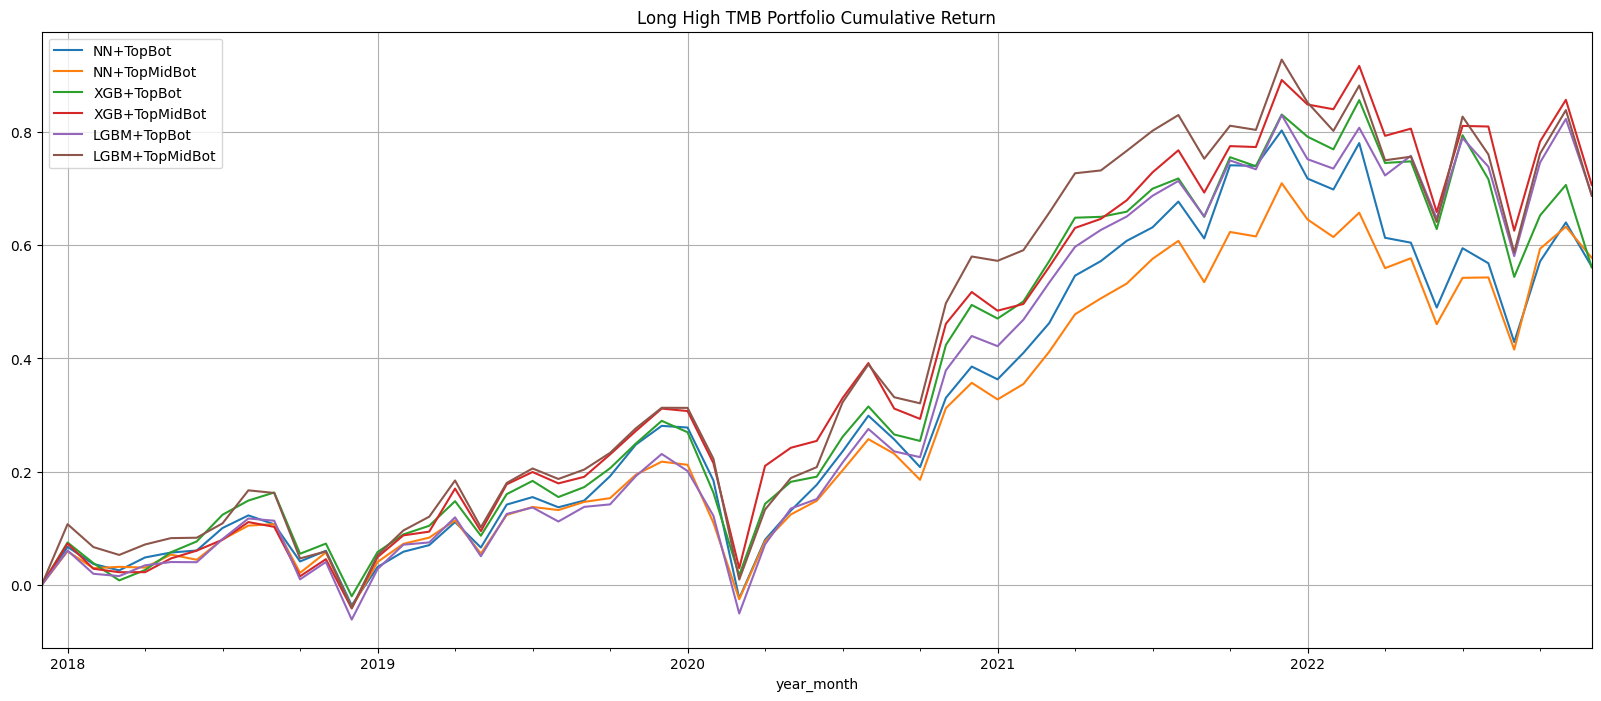

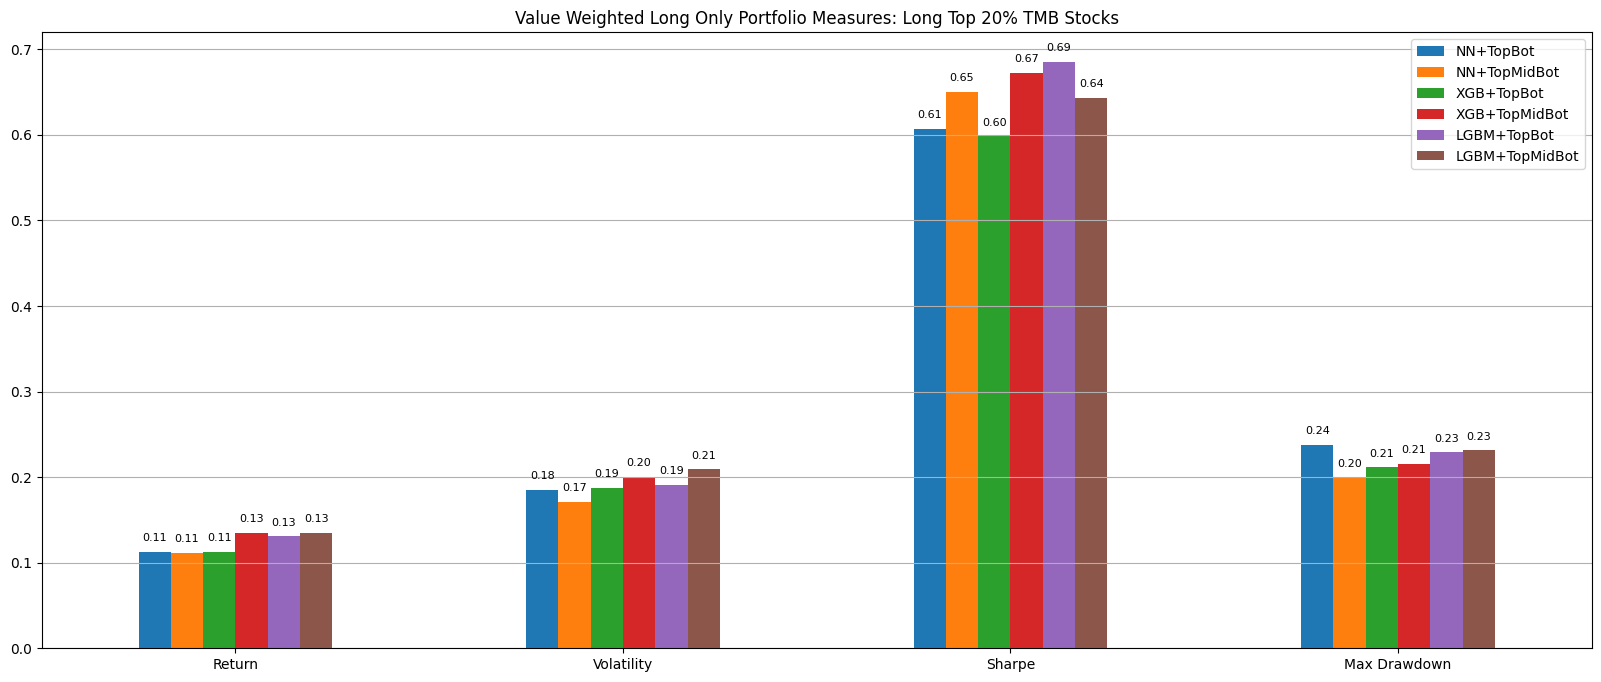

In [8]:
TMB_results = []

for data in datas:
    df = datas[data].copy()
    df['tmb_rank'] = df.groupby('year_month')['tmb'].transform(lambda x: pd.qcut(x, q=5, labels=False))

    # Strategy 1: Long HIGH TMB
    TMB = df[df['tmb_rank'] == 4]
    TMB_pf_ret = TMB.groupby('year_month').apply(lambda x: np.average(x['month_ret'], weights=x['stockmv'])).reset_index()
    TMB_pf_ret.set_index('year_month', inplace=True)
    TMB_results.append(TMB_pf_ret)

def annret(df):
    return ((1+df.mean())**12)-1
def annvol(df):
    return df.std()*np.sqrt(12)
def sharpe(df):
    return annret(df)/annvol(df)
def maxdd(df):
    cumret = (1+df).cumprod()
    cummax = cumret.cummax()
    maxdd = -((cumret/cummax)-1).min()
    return maxdd



TMB_results = pd.concat(TMB_results, axis=1)

TMB_results.columns = ['NN+TopBot', 'NN+TopMidBot', 'XGB+TopBot', 'XGB+TopMidBot', 'LGBM+TopBot', 'LGBM+TopMidBot']

ret_TMB, vol_TMB, sr_TMB, mdd_TMB = annret(TMB_results), annvol(TMB_results), sharpe(TMB_results), maxdd(TMB_results)

Measures_TMB = pd.concat([ret_TMB, vol_TMB, sr_TMB, mdd_TMB], axis=1)

Measures_TMB.columns = ['Return', 'Volatility', 'Sharpe', 'Max Drawdown']

Measures_TMB = Measures_TMB.T

# Convert PeriodDtype to datetime
start_period = '2017-12'
start_period = pd.Period(start_period, freq='M')

TMB_results.loc[start_period]=0

# Convert all index to Period
TMB_results.index = pd.PeriodIndex(TMB_results.index, freq='M')

# Now you can sort the index
TMB_results = TMB_results.sort_index()

TMB_cumu = (1+TMB_results).cumprod()-1

TMB_cumu.plot(title='Long High TMB Portfolio Cumulative Return', figsize=(20, 8), grid=True)
plt.show()
ax = Measures_TMB.plot(kind='bar', figsize=(20, 8), 
                       title='Value Weighted Long Only Portfolio Measures: Long Top 20% TMB Stocks', grid=True)

for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', 
                va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points',
                fontsize=8)
plt.xticks(rotation=0)
plt.grid(axis='x')
plt.show()

In [9]:
features = pd.read_csv('ready.csv').drop('Unnamed: 0', axis=1)

features = features[features['year_month']>='2018']
features = pd.merge(features, PERMNO_CUSIP_Map, on='PERMNO', how='left')
features = pd.merge(features, ETFs, on=['year_month', 'CUSIP'], how='inner')
features.drop_duplicates(subset=['CUSIP', 'year_month'], inplace=True)
display(features)

,year_month,PERMNO,RI_Spread,CP_Spread,Skew,chmom,dolvol,Idiovol,indmom,maxret,mom1m,mom12m,mvel1,retvol,month_ret,CUSIP,mvgroup
0,2018-01,10032,0.161966,0.759847,0.269939,0.422916,0.304126,0.005849,0.293695,0.006203,0.188528,0.118413,0.002213,0.013163,-0.015973,72913210,Small
1,2018-01,10104,0.209353,0.745863,0.199552,0.374854,0.794797,0.006718,0.438618,0.010336,0.183968,0.133864,0.230139,0.027501,0.095383,68389X10,Big
2,2018-01,10107,0.218431,0.746960,0.206082,0.418470,0.895296,0.002807,0.438618,0.012273,0.215311,0.153257,0.744269,0.025579,0.110706,59491810,Big
3,2018-01,10138,0.188973,0.743097,0.225158,0.444680,0.612750,0.005327,0.380277,0.002811,0.220653,0.156540,0.028384,0.008415,0.063854,74144T10,Big
4,2018-01,10145,0.206008,0.749426,0.211769,0.406844,0.733600,0.000479,0.425447,0.005050,0.195662,0.146342,0.133278,0.009166,0.041145,43851610,Big
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
63292,2022-12,93356,0.201888,0.719230,0.265991,0.303625,0.391336,0.004968,0.189687,0.045434,0.246141,0.123820,0.001976,0.058314,-0.097215,78463M10,Small
63293,2022-12,93369,0.417082,0.700210,0.265746,0.196569,0.484192,0.028148,0.189687,0.070337,0.019417,0.044460,0.001744,0.275433,0.209944,77634L10,Mid
63294,2022-12,93374,0.214812,0.745106,0.227228,0.254677,0.442281,0.001835,0.287259,0.040151,0.231290,0.092570,0.002319,0.054230,-0.032653,31847R10,Mid
63295,2022-12,93423,0.182525,0.714803,0.271413,0.247365,0.489572,0.013803,0.189687,0.060868,0.229787,0.079632,0.000772,0.091424,-0.034867,83001A10,Small


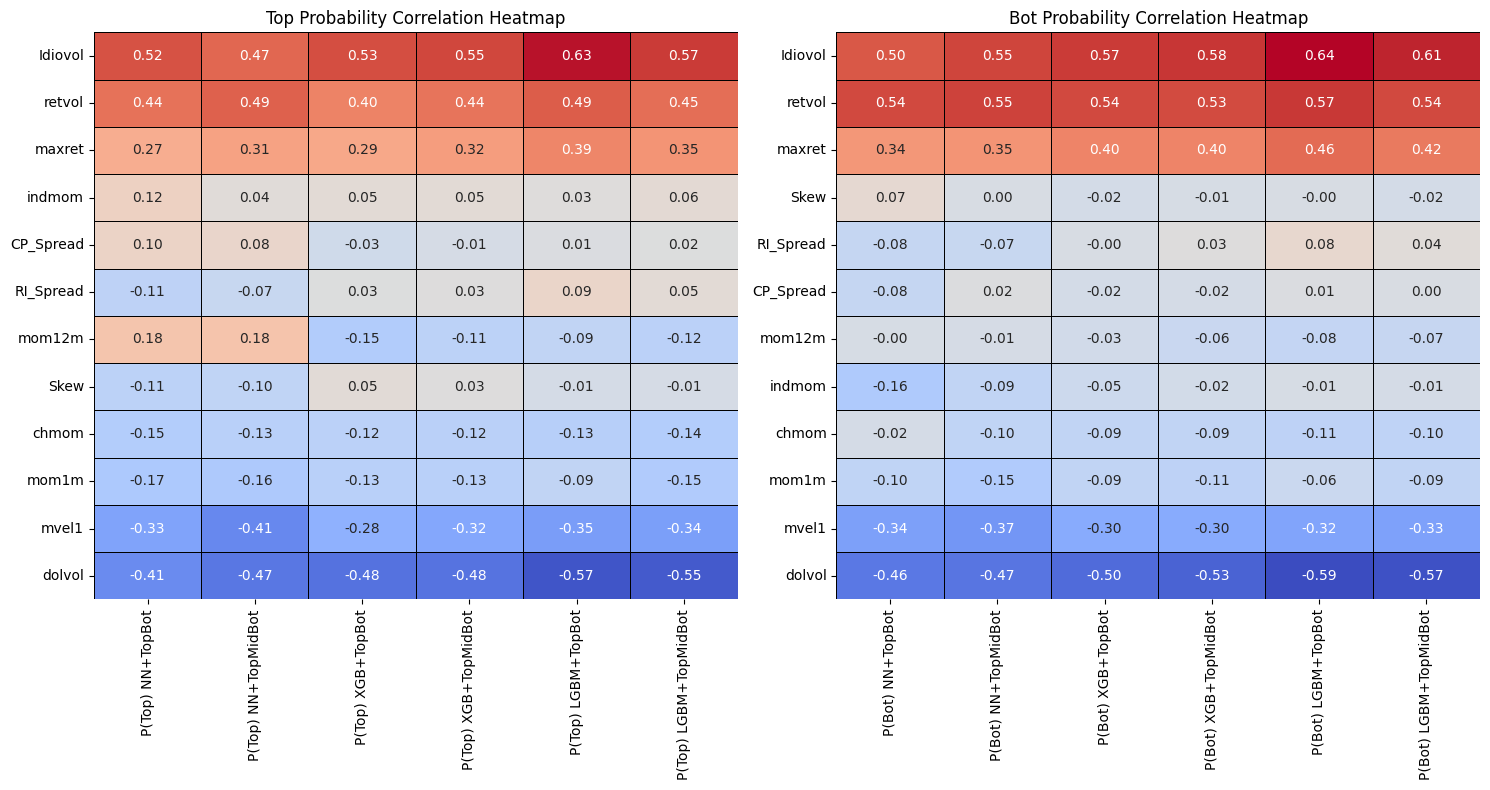

In [10]:
import seaborn as sns

def merge_with_features(data, features):
    data = data.copy()
    data = pd.merge(data, features, on=['year_month', 'CUSIP'], how='inner')
    data.rename(columns={'mvel1_y':'mvel1'}, inplace=True)
    data = data.dropna()
    return data

data_with_features = {}
for data in datas:
    df = datas[data]
    data_with_features[data] = merge_with_features(df, features)
   
 
Vars = ['chmom', 'dolvol', 'Idiovol', 'indmom', 'maxret', 'mom1m', 'mom12m',
       'mvel1', 'retvol', 'Skew', 'RI_Spread', 'CP_Spread',
       'Top_prob_pred', 'Bot_prob_pred', 'tmb']

fig, axs = plt.subplots(ncols=2, figsize=(15, 8))

# Calculate correlations for both Top and Bot probabilities
all_corrs = []
for data in data_with_features:
    for prob in ['Top_prob_pred', 'Bot_prob_pred']:
        if 'd' in data:
            suffix = '+TopBot'
        elif 's' in data:
            suffix = '+TopMidBot'
        if prob == 'Top_prob_pred':
            name = 'P(Top) ' + data[:-1] + suffix
        else:
            name = 'P(Bot) ' + data[:-1] + suffix
            
        corr = data_with_features[data][Vars].corr()[prob].sort_values(ascending = False).drop(['Top_prob_pred', 'Bot_prob_pred', 'tmb']).rename(name)
        all_corrs.append(corr)

# Find the min and max correlation values
vmin = np.min([corr.min() for corr in all_corrs])
vmax = np.max([corr.max() for corr in all_corrs])

# Top Probability Correlation Heatmap
top_corrs = [corr for corr in all_corrs if 'P(Top)' in corr.name]
result = pd.concat(top_corrs, axis=1)
sortby = result.mean(axis = 1).sort_values(ascending = False).index
result = result.loc[sortby]
sns.heatmap(result, cmap='coolwarm', annot=True, cbar=False,
            fmt=".2f", linewidths=0.5, linecolor='black', ax=axs[0], vmin=vmin, vmax=vmax)
axs[0].set_title('Top Probability Correlation Heatmap')

# Bot Probability Correlation Heatmap
bot_corrs = [corr for corr in all_corrs if 'P(Bot)' in corr.name]
result = pd.concat(bot_corrs, axis=1)
sortby = result.mean(axis = 1).sort_values(ascending = False).index
result = result.loc[sortby]
sns.heatmap(result, cmap='coolwarm', annot=True, cbar = False,
            fmt=".2f", linewidths=0.5, linecolor='black', ax=axs[1], vmin=vmin, vmax=vmax)
axs[1].set_title('Bot Probability Correlation Heatmap')

plt.tight_layout()
plt.show()

## Use ATMB to Backtest

In [11]:
# Market Value and Liquidity Filters
mv = pd.read_pickle('mvel1.pickle')
mv['year_month'] = mv['year_month'].astype(str)


# 篩選ETF持有的股票
ETFs = pd.read_csv('ETFs.csv')
ETFs['year_month'] = ETFs['year_month'].astype(str)
ETFs['CUSIP'] = ETFs['CUSIP'].str[:8]
ETFs.rename(columns={'Group':'mvgroup'}, inplace=True)

NNd = pd.read_csv('NN3_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
NNs = pd.read_csv('NN3_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

XGBd = pd.read_csv('XGB_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
XGBs = pd.read_csv('XGB_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

LGBMd = pd.read_csv('LGBM_2models.csv').drop('Unnamed: 0', axis=1)[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]
LGBMs = pd.read_csv('LGBM_1model.csv')[['year_month', 'PERMNO', 'month_ret', 'Top_prob_pred', 'Bot_prob_pred', 'tmb']]

def merge_data(data, PERMNO_CUSIP_Map, mv, ETFs):
    data = pd.merge(data, PERMNO_CUSIP_Map, on='PERMNO', how='left')
    data = pd.merge(data, mv, on=['year_month', 'PERMNO'], how='inner')
    data = pd.merge(data, ETFs, on=['year_month', 'CUSIP'], how='inner')
    data['tpb'] = data['Top_prob_pred'] + data['Bot_prob_pred']
    data['tmb_norm'] = data.groupby('year_month')['tmb'].transform(lambda x: (x-x.mean())/x.std())
    return data


datas = {'NNd': NNd, 'NNs': NNs, 'XGBd': XGBd, 'XGBs': XGBs, 'LGBMd': LGBMd, 'LGBMs': LGBMs}

for data in datas:
    df = datas[data]
    datas[data] = merge_data(df, PERMNO_CUSIP_Map, mv, ETFs)
    
atmb_datas = {}
for data in datas:
    df = datas[data].copy()
    df = df[['year_month', 'PERMNO', 'month_ret', 'stockmv', 'mvgroup', 'tmb_norm']]
    df.rename(columns={'tmb_norm': 'tmb'+data}, inplace=True)
    atmb_datas[data] = df

data = atmb_datas['NNd']
for d in atmb_datas:
    if d != 'NNd':
        data = pd.merge(data, atmb_datas[d], on=['year_month', 'PERMNO', 'month_ret', 'stockmv', 'mvgroup'], how='inner')
data['ATMB'] = data[['tmbNNd', 'tmbNNs', 'tmbXGBd', 'tmbXGBs', 'tmbLGBMd', 'tmbLGBMs']].mean(axis=1)
data.drop(['tmbNNd', 'tmbNNs', 'tmbXGBd', 'tmbXGBs', 'tmbLGBMd', 'tmbLGBMs'], axis=1, inplace=True)
data

,year_month,PERMNO,month_ret,stockmv,mvgroup,ATMB
0,2018-01,10032,-0.015973,2.057702e+06,Small,-0.776928
1,2018-01,10104,0.095383,2.022547e+08,Big,0.610801
2,2018-01,10107,0.110706,6.538361e+08,Big,0.504973
3,2018-01,10138,0.063854,2.504423e+07,Big,0.747299
4,2018-01,10145,0.041145,1.171772e+08,Big,0.025131
...,...,...,...,...,...,...
63292,2022-12,93356,-0.097215,4.632942e+06,Small,-0.001091
63293,2022-12,93369,0.209944,4.095789e+06,Mid,-0.867942
63294,2022-12,93374,-0.032653,5.430236e+06,Mid,-0.222472
63295,2022-12,93423,-0.034867,1.841553e+06,Small,-0.391271


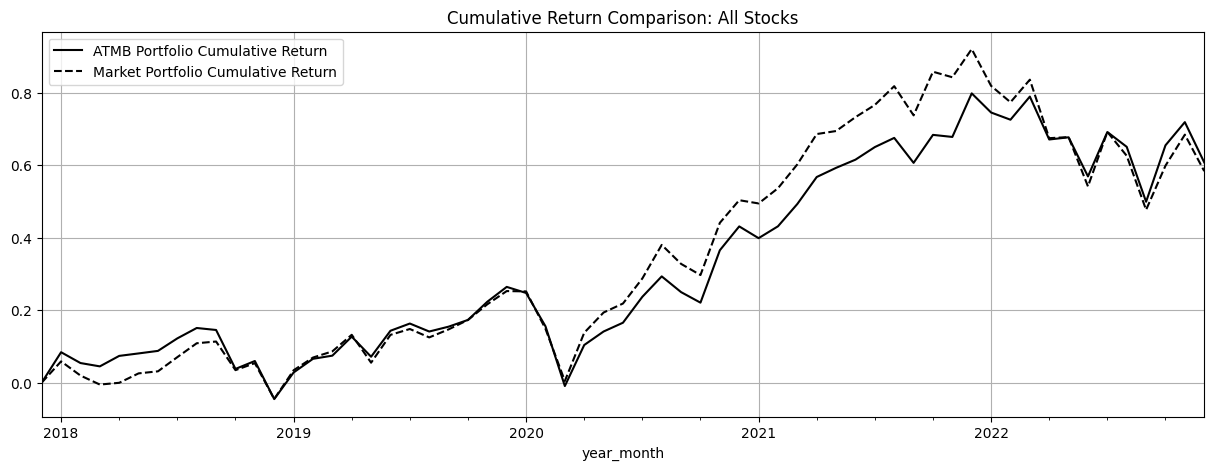

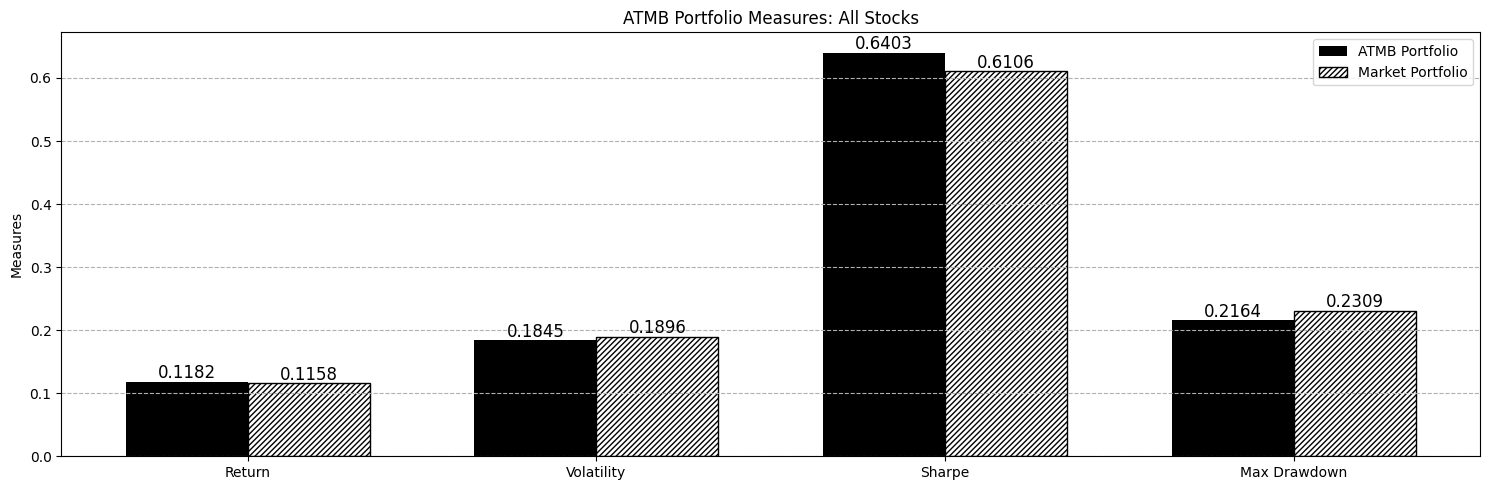

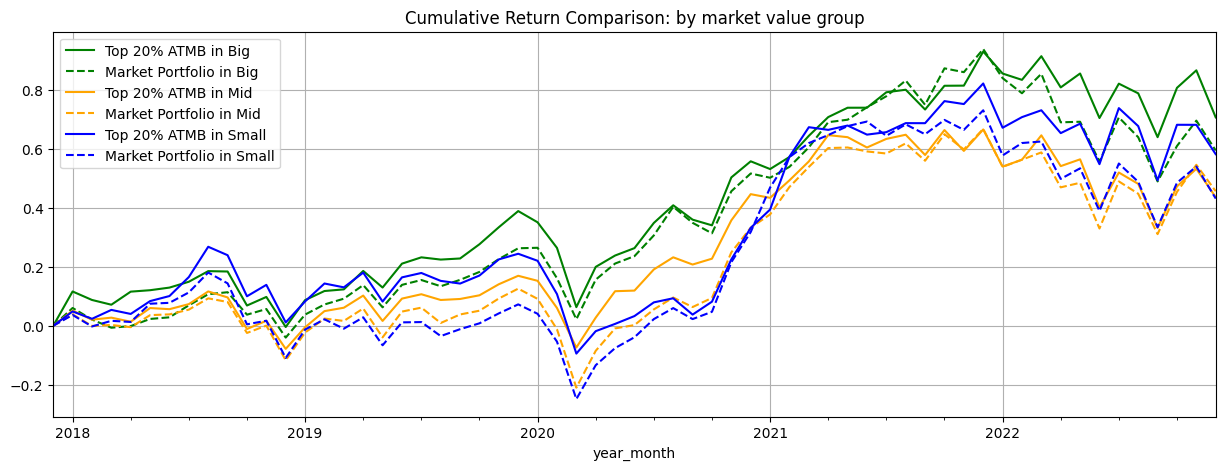

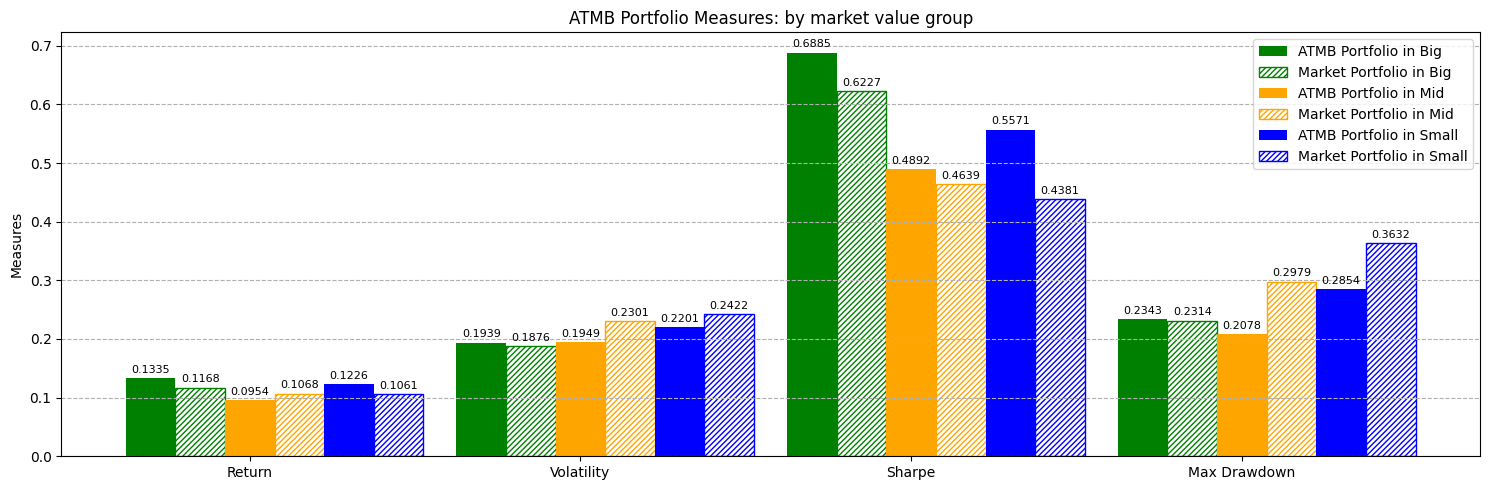

In [29]:
class BackTester:
    def __init__(self, data, by_mv_group:bool):
        self.data = data
        self.mv_group = by_mv_group
        self.run()

        
    def run(self):
        df = self.data.copy()
        if self.mv_group:
            df['ATMB_rank'] = df.groupby(['year_month', 'mvgroup'])['ATMB'].transform(lambda x: pd.qcut(x, 5, labels=False))
            strat = df[df['ATMB_rank']==4]
            strat_ret = strat.groupby(['year_month', 'mvgroup']).apply(lambda x: np.average(x['month_ret'], weights=x['stockmv'])).unstack()
            benchmark = df.groupby(['year_month', 'mvgroup']).apply(lambda x: np.average(x['month_ret'], weights=x['stockmv'])).unstack()
        else:
            df = df.drop_duplicates(subset=['PERMNO', 'year_month'])
            df['ATMB_rank'] = df.groupby('year_month')['ATMB'].transform(lambda x: pd.qcut(x, 5, labels=False))
            strat = df[df['ATMB_rank']==4]
            strat_ret = strat.groupby(['year_month']).apply(lambda x: np.average(x['month_ret'], weights=x['stockmv']))
            benchmark = df.groupby(['year_month']).apply(lambda x: np.average(x['month_ret'], weights=x['stockmv']))
        
        self.strat_ret = strat_ret
        self.benchmark = benchmark
    
    def plot_cumu_return(self):
        fsizes = (15, 5)
        if self.mv_group:
            strat_cumu = ((1+self.strat_ret).cumprod()-1).copy()
            strat_cumu.columns = ['Top 20% ATMB in Big', 'Top 20% ATMB in Mid', 'Top 20% ATMB in Small']

            benchmark_cumu = ((1+self.benchmark).cumprod()-1).copy()
            benchmark_cumu.columns = ['Market Portfolio in Big', 'Market Portfolio in Mid', 'Market Portfolio in Small']
            strat_vs_benchmark = pd.concat([strat_cumu, benchmark_cumu], axis=1)
            strat_vs_benchmark.index = pd.to_datetime(strat_vs_benchmark.index).to_period('M')
            strat_vs_benchmark.loc[pd.Period('2017-12', 'M')] = 0
            strat_vs_benchmark.sort_index(inplace=True)

            plt.figure(figsize=fsizes)
            strat_vs_benchmark['Top 20% ATMB in Big'].plot(color='green', label='Top 20% ATMB in Big', grid=True)
            strat_vs_benchmark['Market Portfolio in Big'].plot(color='green', label='Market Portfolio in Big', linestyle='dashed', grid=True)
            strat_vs_benchmark['Top 20% ATMB in Mid'].plot(color='orange', label='Top 20% ATMB in Mid', grid=True)
            strat_vs_benchmark['Market Portfolio in Mid'].plot(color='orange', label='Market Portfolio in Mid', linestyle='dashed', grid=True)
            strat_vs_benchmark['Top 20% ATMB in Small'].plot(color='blue', label='Top 20% ATMB in Small', grid=True)
            strat_vs_benchmark['Market Portfolio in Small'].plot(color='blue', label='Market Portfolio in Small', linestyle='dashed', grid=True)
            plt.title('Cumulative Return Comparison: by market value group')
            plt.legend()
            plt.show()
            
        else:
            strat_cumu = (1+self.strat_ret).cumprod()-1
            benchmark_cumu = (1+self.benchmark).cumprod()-1
            strat_vs_benchmark = pd.concat([strat_cumu, benchmark_cumu], axis=1)
            strat_vs_benchmark.columns = ['ATMB Portfolio Cumulative Return', 'Market Portfolio Cumulative Return']
            strat_vs_benchmark.index = pd.to_datetime(strat_vs_benchmark.index).to_period('M')
            strat_vs_benchmark.loc[pd.Period('2017-12', 'M')] = 0
            strat_vs_benchmark.sort_index(inplace=True)

            plt.figure(figsize=fsizes)
            strat_vs_benchmark['ATMB Portfolio Cumulative Return'].plot(color='black', label='ATMB Portfolio Cumulative Return', grid=True)
            strat_vs_benchmark['Market Portfolio Cumulative Return'].plot(color='black', label='Market Portfolio Cumulative Return', linestyle='dashed', grid=True)
            plt.title('Cumulative Return Comparison: All Stocks')
            plt.legend()
            plt.show() 
    
    def get_measures(self):
        '''
        Annualized Return, Volatility, Sharpe Ratio, Max Drawdown
        '''
        strat_ret = self.strat_ret.copy()
        benchmark = self.benchmark.copy()
        def annret(df):
            return ((1+df.mean())**12)-1
        def annvol(df):
            return df.std()*np.sqrt(12)
        def sharpe(df):
            return annret(df)/annvol(df)
        def maxdd(df):
            cumret = (1+df).cumprod()
            cummax = cumret.cummax()
            maxdd = -((cumret/cummax)-1).min()
            return maxdd
        annret_strat, annvol_strat, sr_strat, mdd_strat = annret(strat_ret), annvol(strat_ret), sharpe(strat_ret), maxdd(strat_ret)
        annret_benchmark, annvol_benchmark, sr_benchmark, mdd_benchmark = annret(benchmark), annvol(benchmark), sharpe(benchmark), maxdd(benchmark)
        if self.mv_group:
            measures = pd.DataFrame({'ATMB Portfolio in Big': [annret_strat[0], annvol_strat[0], sr_strat[0], mdd_strat[0]],
                                     'Market Portfolio in Big': [annret_benchmark[0], annvol_benchmark[0], sr_benchmark[0], mdd_benchmark[0]],
                                     'ATMB Portfolio in Mid': [annret_strat[1], annvol_strat[1], sr_strat[1], mdd_strat[1]],
                                     'Market Portfolio in Mid': [annret_benchmark[1], annvol_benchmark[1], sr_benchmark[1], mdd_benchmark[1]],
                                     'ATMB Portfolio in Small': [annret_strat[2], annvol_strat[2], sr_strat[2], mdd_strat[2]],
                                     'Market Portfolio in Small': [annret_benchmark[2], annvol_benchmark[2], sr_benchmark[2], mdd_benchmark[2]]},
                                     index=['Return', 'Volatility', 'Sharpe', 'Max Drawdown'])
            
        else:
            measures = pd.DataFrame({'ATMB Portfolio': [annret_strat, annvol_strat, sr_strat, mdd_strat],
                                     'Market Portfolio': [annret_benchmark, annvol_benchmark, sr_benchmark, mdd_benchmark]},
                                     index=['Return', 'Volatility', 'Sharpe', 'Max Drawdown'])
        return measures
    
    def plot_measures(self):
        fsizes = (15, 5)
        if self.mv_group:
            measures = self.get_measures()
            labels = measures.index
            big_ATMB = measures['ATMB Portfolio in Big']
            big_Market = measures['Market Portfolio in Big']
            mid_ATMB = measures['ATMB Portfolio in Mid']
            mid_Market = measures['Market Portfolio in Mid']
            small_ATMB = measures['ATMB Portfolio in Small']
            small_Market = measures['Market Portfolio in Small']

            x = np.arange(len(labels))  # the label locations
            width = 0.15  # the width of the bars

            fig, ax = plt.subplots(figsize=fsizes)
            rects1 = ax.bar(x - 2*width, big_ATMB, width, label='ATMB Portfolio in Big', color='green')
            rects2 = ax.bar(x - width, big_Market, width, label='Market Portfolio in Big', color='white', edgecolor='green', hatch='//////')
            rects3 = ax.bar(x, mid_ATMB, width, label='ATMB Portfolio in Mid', color='orange')
            rects4 = ax.bar(x + width, mid_Market, width, label='Market Portfolio in Mid', color='white', edgecolor='orange', hatch='//////')
            rects5 = ax.bar(x + 2*width, small_ATMB, width, label='ATMB Portfolio in Small', color='blue')
            rects6 = ax.bar(x + 3*width, small_Market, width, label='Market Portfolio in Small', color='white', edgecolor='blue', hatch='//////')

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Measures')
            ax.set_title('ATMB Portfolio Measures: by market value group')
            ax.set_xticks(x)
            ax.set_xticklabels(labels)
            ax.legend()
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.4f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 6), 
                            textcoords = 'offset points',
                            fontsize=8)
            fig.tight_layout()
            ax.grid(axis='y', linestyle='--', alpha=1)
            plt.show()
            
        else:
            measures = self.get_measures()
            ATMB = measures['ATMB Portfolio']
            Market = measures['Market Portfolio']

            x = np.arange(len(measures.index))  # the label locations
            width = 0.35  # the width of the bars

            fig, ax = plt.subplots(figsize=fsizes)
            rects1 = ax.bar(x - width/2, ATMB, width, label='ATMB Portfolio', color='black')
            rects2 = ax.bar(x + width/2, Market, width, label='Market Portfolio', color='white', edgecolor='black', hatch='//////')

            # Add some text for labels, title and custom x-axis tick labels, etc.
            ax.set_ylabel('Measures')
            ax.set_title('ATMB Portfolio Measures: All Stocks')
            ax.set_xticks(x)
            ax.set_xticklabels(measures.index)
            ax.legend()
            for p in ax.patches:
                ax.annotate(format(p.get_height(), '.4f'), 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha = 'center', 
                            va = 'center', 
                            xytext = (0, 6), 
                            textcoords = 'offset points',
                            fontsize=12)
            fig.tight_layout()
            ax.grid(axis='y', linestyle='--', alpha=1)
            plt.show()

bt_all = BackTester(data, by_mv_group=False)
bt_bycap = BackTester(data, by_mv_group=True)
bt_all.plot_cumu_return()
bt_all.plot_measures()
bt_bycap.plot_cumu_return()
bt_bycap.plot_measures()

In [70]:
def get_FF3():
    FF3 = pd.read_csv('FF3.csv').rename(columns={'Unnamed: 0':'year_month'})
    FF3['year_month'] = FF3['year_month'].astype(str)
    FF3['year_month'] = FF3['year_month'].str[:4] + '-' + FF3['year_month'].str[4:]
    FF3.set_index('year_month', inplace=True)
    FF3.index = pd.to_datetime(FF3.index).to_period('M')
    FF3/=100
    return FF3

FF3 = get_FF3()
bt_bycap = BackTester(data, by_mv_group=True)
bt_all = BackTester(data, by_mv_group=False)
bt_all.strat_ret = bt_all.strat_ret.to_frame()
bt_all.strat_ret.columns = ['All']
bt_all.strat_ret.index = pd.to_datetime(bt_all.strat_ret.index).to_period('M')
bt_bycap.strat_ret.index = pd.to_datetime(bt_bycap.strat_ret.index).to_period('M')
PF_results = bt_bycap.strat_ret.join(bt_all.strat_ret).join(FF3)

import statsmodels.api as sm

def run_regression(data, y):
    X = sm.add_constant(data[['Mkt-RF', 'SMB', 'HML']])
    Y = data[y]-data['RF']
    model = sm.OLS(Y, X)
    results = model.fit()
    return results.params.round(4), results.tvalues.round(2), results

summary = pd.DataFrame()
for col in ['Small', 'Mid', 'Big', 'All']:
    params, tvalues, results = run_regression(PF_results, col)
    summary[f'{col} coefficients'] = params
    summary[f'{col} t-values'] = tvalues

display(summary.T)

,const,Mkt-RF,SMB,HML
Small coefficients,0.0027,0.8810,0.6307,0.3300
Small t-values,0.8400,14.7400,5.2000,4.5600
Mid coefficients,-0.0002,0.9303,0.1414,0.0978
Mid t-values,-0.0900,21.5500,1.6100,1.8700
Big coefficients,0.0024,0.9485,-0.0739,0.1763
Big t-values,1.0600,22.3100,-0.8600,3.4300
All coefficients,0.0014,0.9284,-0.0814,0.1326
All t-values,0.8400,30.1500,-1.3000,3.5600
